In [1]:
%cd mmdetection
import mmcv

/data/Detection_proj/mmdetection


In [2]:
from mmdet.apis import set_random_seed
from mmcv import Config
from pprint import pprint
#cfg = Config.fromfile('./configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_coco.py')
#faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth
cfg = Config.fromfile('./flag_proj/faster-rcnn/flag_config.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

In [3]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint = 'flag_proj/faster-rcnn/faster-rcnn.pth'
# initialize the detector
model = init_detector(cfg, checkpoint, device='cuda:0')

/data/Detection_proj/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


# 使用 faster-rcnn 选取最终测试集需要人工标注的样本

In [34]:
import os
from tqdm import tqdm
import pdb
import json

img_root = '/data/flag/test_dataset'
#save_root = '/data/flag/test_dataset_result'
videos = [os.path.join(img_root,vi) for vi in os.listdir(img_root)]
videos.sort()

for vi in videos:
    if os.path.isdir(vi):
        #pdb.set_trace()
        vi_dir = vi.split('/')[-1]
        #save_dir = os.path.join(save_root,vi_dir)
        #if not os.path.exists(save_dir):
        #    os.makedirs(save_dir)
            
        #print(save_dir)
        imgs = [os.path.join(vi,im) for im in os.listdir(vi)]
        #print(imgs)
        video_flag_count = []
        
        for img_path in tqdm(imgs):
            #save_path = os.path.join(save_dir,img.split('/')[-1])
            #print(save_path)
            total_count = 0
            img = mmcv.imread(img_path)
            result = inference_detector(model, img)
            #show_result_pyplot(model, img, result)
            #model.show_result(img, result,score_thr=0.5,out_file=save_path)
            for i in range(len(result)):
                flags = result[i].shape[0]
                for fl in range(flags):
                    if result[i][fl][-1] > 0.5:
                        total_count += 1
            tmp = {'image':img_path,'flag_count':total_count}
            
            video_flag_count.append(tmp)
        with open(os.path.join(img_root,vi_dir+'.json')) as f:
            json.dump(video_flag_count,f)
            #assert 0

  6%|▌         | 130/2093 [00:31<08:02,  4.07it/s]


KeyboardInterrupt: 

In [25]:
video_flag_count = sorted(video_flag_count,key=lambda x:(x['image'].split('/')[-2],-x['flag_count']))

In [36]:
video_flag_count

[{'image': '/data/flag/test_dataset/ffout-a0021so808b/01054.jpg',
  'flag_count': 4},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/01767.jpg',
  'flag_count': 0},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/01600.jpg',
  'flag_count': 1},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/00226.jpg',
  'flag_count': 0},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/00162.jpg',
  'flag_count': 0},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/01781.jpg',
  'flag_count': 2},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/00292.jpg',
  'flag_count': 1},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/02070.jpg',
  'flag_count': 1},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/01937.jpg',
  'flag_count': 2},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/00240.jpg',
  'flag_count': 0},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/00664.jpg',
  'flag_count': 0},
 {'image': '/data/flag/test_dataset/ffout-a0021so808b/

In [26]:
video_name = 'ffout-c002160nqjr'
split_video = []
for vi in video_flag_count:
    if vi['image'].split('/')[-2] == video_name:
        split_video.append(vi)
    else:
        with open(os.path.join(img_root,video_name+'.json')) as f:
            json.dump(split_video,f)
        video_name = vi['image'].split('/')[-2]
        split_video = []
    
        

[{'image': '/data/flag/test_dataset/ffout-c002160nqjr/00096.jpg',
  'flag_count': 15},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/02274.jpg',
  'flag_count': 11},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/01767.jpg',
  'flag_count': 9},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/02217.jpg',
  'flag_count': 7},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/02239.jpg',
  'flag_count': 7},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/02270.jpg',
  'flag_count': 7},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/00080.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/00082.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/00349.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/01014.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-c002160nqjr/01080.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-c002160nqj

In [6]:
import os
from tqdm import tqdm
import pdb
import json
from pathlib import Path

img_root = '/data/flag/test_dataset'

In [31]:
json_paths = list(Path(img_root).glob('*.json'))
json_paths

[PosixPath('/data/flag/test_dataset/ffout-f00215tk67q.json'),
 PosixPath('/data/flag/test_dataset/ffout-n0021r9pa4t.json'),
 PosixPath('/data/flag/test_dataset/ffout-w0021n2d80c.json'),
 PosixPath('/data/flag/test_dataset/ffout-z00212bjkvp.json'),
 PosixPath('/data/flag/test_dataset/ffout-u00219eu8m3.json'),
 PosixPath('/data/flag/test_dataset/ffout-c002160nqjr.json'),
 PosixPath('/data/flag/test_dataset/ffout-p00210wgixi.json'),
 PosixPath('/data/flag/test_dataset/ffout-i09381b3eeg.json'),
 PosixPath('/data/flag/test_dataset/ffout-n0021k4xkub.json'),
 PosixPath('/data/flag/test_dataset/ffout-y0021lu67r7.json'),
 PosixPath('/data/flag/test_dataset/ffout-a0021so808b.json'),
 PosixPath('/data/flag/test_dataset/ffout-c0021j4eqth.json'),
 PosixPath('/data/flag/test_dataset/ffout-b00219wkkjc.json'),
 PosixPath('/data/flag/test_dataset/ffout-n002174wq4p.json'),
 PosixPath('/data/flag/test_dataset/ffout-e00213twop9.json'),
 PosixPath('/data/flag/test_dataset/ffout-n00217r6s3g.json'),
 PosixPa

In [77]:
def calculate(js,over40=1,over30=1,over20=1,over10=1,over8=5):
    
    #total_total_flag = 0
    with open(js) as f:
        img_counts = json.load(f)
    img_counts.sort(key=lambda x:(-x['flag_count']))
    #img_counts.sort(key=lambda x:(x['image']))
    total_flag = 0
    total_img = 0

    img_need = []

    over_40 = 0
    over_30 = 0
    over_20 = 0
    over_10 = 0
    over_8 = 0
    print('img_counts',len(img_counts))
    if len(img_counts)>2000:
        img_counts = img_counts[::5]
    else:
        img_counts = img_counts[::3]

    for im in img_counts:
        #if im['flag_count'] < 2:
        #    continue
        if total_flag < 250:
            #img_id = int(os.path.basename(im['image']).split('.')[0])
            if im['flag_count'] >=40:
                if over_40 <over40:
                    over_40 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=30 and im['flag_count'] <40:
                if over_30 <over30:
                    over_30 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=20 and im['flag_count'] <30:
                if  over_20 <over20:
                    over_20 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=10 and im['flag_count'] <20:
                if  over_10 <over10:
                    over_10 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=8 and im['flag_count'] <10:
                if  over_8<over8:
                    over_8 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            else:
                total_flag += im['flag_count']
                img_need.append(im)
                continue
        else:
            break
    total_img += len(img_need)
    #total_total_flag += total_flag
    print(js)
    print(total_flag)
    print(len(img_need))
    print()
    return total_img,total_flag,img_need

In [80]:
total_img = 0
total_total_flag = 0


for js in json_paths:
    o_40 = 1
    o_30 = 1
    o_20 = 1
    o_10 = 1
    o_8 = 5
    tt_img,tt_flag,img_need = calculate(js,o_40,o_30,o_20,o_10,o_8)
    
    while tt_img > 150:
        o_40 += 1
        o_30 += 1
        o_20 += 1
        o_10 += 1
        o_8 += 1
        tt_img,tt_flag,img_need = calculate(js,o_40,o_30,o_20,o_10,o_8)
    
    #print(js)
    #print(tt_img)
    #print(tt_flag)
    
    total_img += tt_img
    total_total_flag += tt_flag
    #done = False
    '''for im in img_need:
        img_path = im['image']
        vi_id,im_name = img_path.split('/')[-2],img_path.split('/')[-1]
        save_path = os.path.join(save_dir,vi_id,im_name)
        if not os.path.exists(os.path.dirname(save_path)):
            os.makedirs(os.path.dirname(save_path))
        else:
            if not done:
                done = True
                os.system('rm {}/*'.format(os.path.dirname(save_path)))
        commd = 'cp {} {}'.format(img_path,save_path)
        os.system(commd)'''
        #print(commd)
    
print(total_img)
print(total_total_flag)
    #break
        

img_counts 1370
/data/flag/test_dataset/ffout-f00215tk67q.json
250
136

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
207
165

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
215
166

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
223
167

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
231
168

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
239
169

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
247
170

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
250
93

img_counts 404
/data/flag/test_dataset/ffout-w0021n2d80c.json
123
134

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

i

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.j

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_coun

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2


img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json


img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_coun

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_coun

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.j

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk


img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json


220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.j

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_coun

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_coun

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
2

220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjk

KeyboardInterrupt: 

In [87]:
total_img = 0
total_total_flag = 0
for js in json_paths:
    with open(js) as f:
        img_counts = json.load(f)
    img_counts.sort(key=lambda x:(-x['flag_count']))
    #img_counts.sort(key=lambda x:(x['image']))
    total_flag = 0
    
    img_need = []
    
    over_40 = 0
    over_30 = 0
    over_20 = 0
    over_10 = 0
    over_8 = 0
    print('img_counts',len(img_counts))
    if len(img_counts)>2000:
        img_counts = img_counts[::5]
    else:
        img_counts = img_counts[::3]
    
    for im in img_counts:
        #if im['flag_count'] < 2:
        #    continue
        if total_flag < 250:
            #img_id = int(os.path.basename(im['image']).split('.')[0])
            if im['flag_count'] >=40:
                if over_40 <1:
                    over_40 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=30 and im['flag_count'] <40:
                if over_30 <1:
                    over_30 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=20 and im['flag_count'] <30:
                if  over_20 <1:
                    over_20 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=10 and im['flag_count'] <20:
                if  over_10 <2:
                    over_10 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            elif im['flag_count'] >=5 and im['flag_count'] <10:
                if  over_8<8:
                    over_8 += 1     
                    total_flag += im['flag_count']
                    img_need.append(im)
                    continue
            else:
                total_flag += im['flag_count']
                img_need.append(im)
                continue
        else:
            break
    total_img += len(img_need)
    total_total_flag += total_flag
    print(js)
    print(total_flag)
    print(len(img_need))
    print()
    done = False
    for im in img_need:
        img_path = im['image']
        vi_id,im_name = img_path.split('/')[-2],img_path.split('/')[-1]
        save_path = os.path.join(save_dir,vi_id,im_name)
        if not os.path.exists(os.path.dirname(save_path)):
            os.makedirs(os.path.dirname(save_path))
        else:
            if not done:
                done = True
                os.system('rm {}/*'.format(os.path.dirname(save_path)))
        commd = 'cp {} {}'.format(img_path,save_path)
        os.system(commd)
        #print(commd)
    
print(total_img)
print(total_total_flag)
    #break
        

img_counts 1370
/data/flag/test_dataset/ffout-f00215tk67q.json
250
131

img_counts 517
/data/flag/test_dataset/ffout-n0021r9pa4t.json
225
167

img_counts 404
/data/flag/test_dataset/ffout-w0021n2d80c.json
133
135

img_counts 1534
/data/flag/test_dataset/ffout-z00212bjkvp.json
220
512

img_counts 628
/data/flag/test_dataset/ffout-u00219eu8m3.json
250
99

img_counts 788
/data/flag/test_dataset/ffout-c002160nqjr.json
252
79

img_counts 751
/data/flag/test_dataset/ffout-p00210wgixi.json
250
60

img_counts 571
/data/flag/test_dataset/ffout-i09381b3eeg.json
179
191

img_counts 1992
/data/flag/test_dataset/ffout-n0021k4xkub.json
251
79

img_counts 1472
/data/flag/test_dataset/ffout-y0021lu67r7.json
250
145

img_counts 2093
/data/flag/test_dataset/ffout-a0021so808b.json
250
81

img_counts 280
/data/flag/test_dataset/ffout-c0021j4eqth.json
101
94

img_counts 6867
/data/flag/test_dataset/ffout-b00219wkkjc.json
252
29

img_counts 4699
/data/flag/test_dataset/ffout-n002174wq4p.json
250
85

img_cou

In [65]:
img_need

[{'image': '/data/flag/test_dataset/ffout-i00211vjemz/01732.jpg',
  'flag_count': 50},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/01723.jpg',
  'flag_count': 39},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/04168.jpg',
  'flag_count': 11},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/03424.jpg',
  'flag_count': 10},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/01831.jpg',
  'flag_count': 9},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/03229.jpg',
  'flag_count': 9},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/03400.jpg',
  'flag_count': 9},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/04147.jpg',
  'flag_count': 9},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/02881.jpg',
  'flag_count': 8},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/00739.jpg',
  'flag_count': 7},
 {'image': '/data/flag/test_dataset/ffout-i00211vjemz/01804.jpg',
  'flag_count': 7},
 {'image': '/data/flag/test_dataset/ffout-i00211vj

In [17]:
save_dir = '/data/flag/test_dataset_label'
for im in img_need:
    img_path = im['image']
    vi_id,im_name = img_path.split('/')[-2],img_path.split('/')[-1]
    save_path = os.path.join(save_dir,vi_id,im_name)
    if not os.path.exists(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))
    commd = 'cp {} {}'.format(img_path,save_path)
    os.system(commd)
    print(commd)
    

cp /data/flag/test_dataset/ffout-f00215tk67q/03079.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/03079.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/03085.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/03085.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/03094.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/03094.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/03097.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/03097.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/01774.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/01774.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/02224.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/02224.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/00349.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/00349.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/02218.jpg /data/flag/test_dataset_label/ffout-f00215tk67q/02218.jpg
cp /data/flag/test_dataset/ffout-f00215tk67q/00331.jpg /data/flag/test_dataset_label/ffout-f0021

In [50]:
os.path.dirname(save_path)

'/data/flag/test_dataset_label/ffout-i00211vjemz'

In [9]:
img_counts.sort(key=lambda x:(-x['flag_count']))
img_counts

[{'image': '/data/flag/test_dataset/ffout-h0021sst65l/02185.jpg',
  'flag_count': 7},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00016.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00022.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00226.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00445.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00490.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/01051.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/01237.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/01999.jpg',
  'flag_count': 6},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00052.jpg',
  'flag_count': 5},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/00304.jpg',
  'flag_count': 5},
 {'image': '/data/flag/test_dataset/ffout-h0021sst65l/

In [10]:
total_flag = 0
for im in img_counts[:50]:
    total_flag += im['flag_count']
total_flag

253

# 测试faster-rcnn可视化的效果

In [23]:
import os
from tqdm import tqdm
img_root = '/data/flag/test_dataset'
save_root = '/data/flag/test_dataset_result'
videos = [os.path.join(img_root,vi) for vi in os.listdir(img_root)]
videos.sort()
for vi in videos:
    if os.path.isdir(vi):
        vi_dir = vi.split('/')[-1]
        save_dir = os.path.join(save_root,vi_dir)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
            
        print(save_dir)
        imgs = [os.path.join(vi,im) for im in os.listdir(vi)]
        #print(imgs)
        for img in tqdm(imgs):
            save_path = os.path.join(save_dir,img.split('/')[-1])
            #print(save_path)
            img = mmcv.imread(img)
            result = inference_detector(model, img)
            #show_result_pyplot(model, img, result)
            model.show_result(img, result,score_thr=0.5,out_file=save_path)
        assert 0

  0%|          | 0/2093 [00:00<?, ?it/s]

/data/flag/test_dataset_result/ffout-a0021so808b


100%|██████████| 2093/2093 [10:58<00:00,  3.18it/s]


AssertionError: 

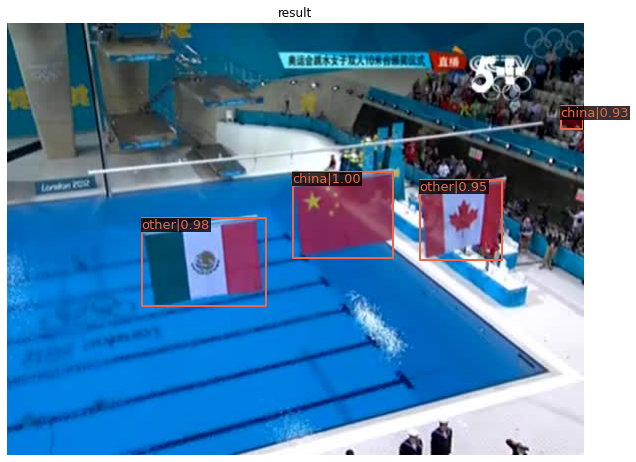

In [17]:
img = mmcv.imread('/data/flag/test_sample/00287.jpg')

model.cfg = cfg
result = inference_detector(model, img)
#show_result_pyplot(model, img, result)
model.show_result(img, result,out_file='test_detector.jpg')

In [13]:
result

[array([[285.9203    , 149.17374   , 385.45386   , 235.55327   ,
           0.9995258 ],
        [553.43866   ,  83.17791   , 575.7221    , 106.2544    ,
           0.92717826]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[4.1354214e+02, 1.5608525e+02, 4.9665466e+02, 2.4101558e+02,
         8.0908313e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[134.89307  , 195.0175   , 258.71375  , 283.8772   ,   0.9826476],
        [412.61557  , 157.17952  , 494.33786  , 237.54614  ,   0.9471162]],
       dtype=float32)]

In [10]:
type(img)

numpy.ndarray